# Instalar y cargar paquetes

In [ ]:
# Instala los paquetes:
install.packages("syuzhet")
install.packages("RColorBrewer")
install.packages("wordcloud")
install.packages("tm")
install.packages("knitr")

# Carga los paquetes
library(syuzhet)
library(RColorBrewer)
library(wordcloud)
library(tm)
library(knitr)

In [113]:
texto_cadena <- get_text_as_string("OpinionesPocoX3.txt")

Warning message in readLines(path_to_file):
“incomplete final line found on 'OpinionesPocoX3.txt'”


In [114]:
texto_palabras <- get_tokens(texto_cadena)
head(texto_palabras)

[1] "poco"    "x3"      "pro"     "hermoso" "celular" "y"

# Extracción de datos con el Léxico de Sentimientos NRC

### Diccionario de léxico NRC:
Este vocabulario con valores de sentimiento negativo o positivo y ocho emociones ha sido desarrollado por Saif M. Mohammad, científico del Consejo de Investigación Nacional de Canadá

In [115]:
oraciones_vector <- get_sentences(texto_cadena)
print(oraciones_vector)

 [1] "Poco x3 pro."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [116]:
sentimientos_df <- get_nrc_sentiment(texto_palabras, lang="spanish")
head(sentimientos_df)

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0


In [112]:
# temp_miau <- sentimientos_df

# Resumen del texto

In [117]:
summary(sentimientos_df)

     anger           anticipation        disgust              fear       
 Min.   :0.000000   Min.   :0.00000   Min.   :0.000000   Min.   :0.0000  
 1st Qu.:0.000000   1st Qu.:0.00000   1st Qu.:0.000000   1st Qu.:0.0000  
 Median :0.000000   Median :0.00000   Median :0.000000   Median :0.0000  
 Mean   :0.007371   Mean   :0.01474   Mean   :0.007371   Mean   :0.0172  
 3rd Qu.:0.000000   3rd Qu.:0.00000   3rd Qu.:0.000000   3rd Qu.:0.0000  
 Max.   :2.000000   Max.   :2.00000   Max.   :1.000000   Max.   :2.0000  
      joy            sadness           surprise            trust        
 Min.   :0.0000   Min.   :0.00000   Min.   :0.000000   Min.   :0.00000  
 1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.000000   1st Qu.:0.00000  
 Median :0.0000   Median :0.00000   Median :0.000000   Median :0.00000  
 Mean   :0.0172   Mean   :0.01966   Mean   :0.004914   Mean   :0.03931  
 3rd Qu.:0.0000   3rd Qu.:0.00000   3rd Qu.:0.000000   3rd Qu.:0.00000  
 Max.   :1.0000   Max.   :2.00000   Max.   :

# Análisis de las emociones de un texto

## Gráfico de barras

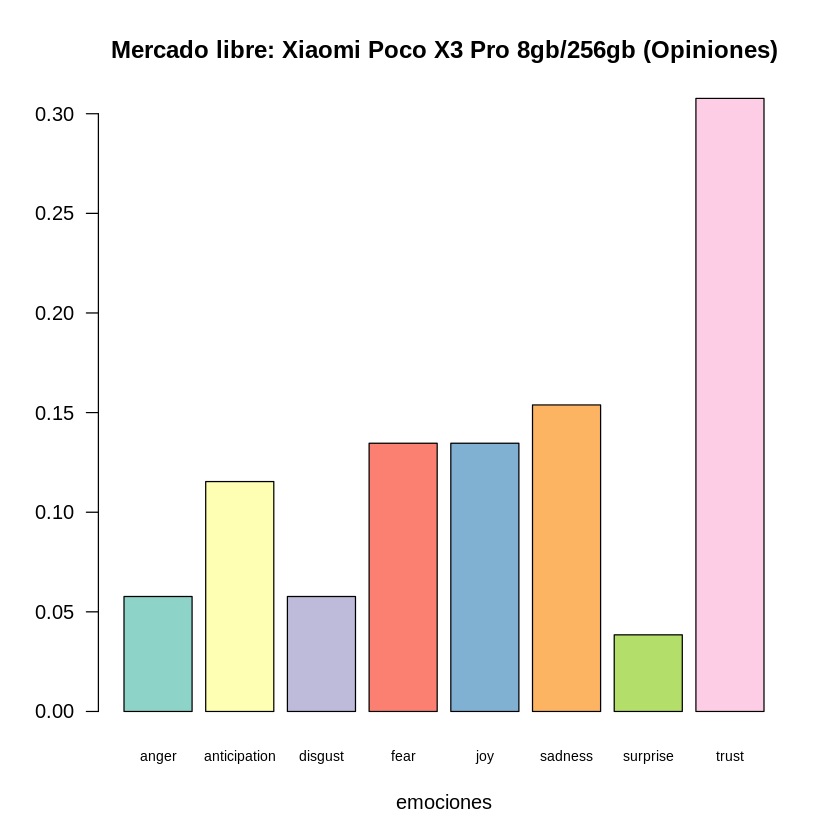

In [161]:
barplot(
  colSums(prop.table(sentimientos_df[, 1:8])),
  space = 0.2,
  horiz = FALSE,
  las = 1,
  cex.names = 0.7,
  col = brewer.pal(n = 8, name = "Set3"),
  main = "Mercado libre: Xiaomi Poco X3 Pro 8gb/256gb (Opiniones)",
  # sub = "Análisis realizado por ",
  xlab="emociones", ylab = NULL)

In [91]:
# barplot(colSums(prop.table(sentimientos_df[, 1:8])))

# Recuento de palabras con cada emoción

In [145]:
palabras_tristeza <- texto_palabras[sentimientos_df$sadness> 0]

In [146]:
palabras_tristeza_orden <- sort(table(unlist(palabras_tristeza)), decreasing = TRUE)
head(palabras_tristeza_orden, n = 12)


    muy defecto    duda    malo    peso 
      3       1       1       1       1 

# Nube de emociones

In [147]:
nube_emociones_vector <- c(
  paste(texto_palabras[sentimientos_df$sadness> 0], collapse = " "),
  paste(texto_palabras[sentimientos_df$joy > 0], collapse = " "),
  paste(texto_palabras[sentimientos_df$anger > 0], collapse = " "),
  paste(texto_palabras[sentimientos_df$fear > 0], collapse = " "))

In [148]:
nube_corpus <- Corpus(VectorSource(nube_emociones_vector))

In [149]:
nube_tdm <- TermDocumentMatrix(nube_corpus)
nube_tdm <- as.matrix(nube_tdm)
# head(nube_tdm)

In [150]:
colnames(nube_tdm) <- c('tristeza', 'felicidad', 'enfado', 'confianza')
head(nube_tdm)

,tristeza,felicidad,enfado,confianza
defecto,1,0,1,1
duda,1,0,0,1
malo,1,0,1,1
muy,3,0,0,0
peso,1,1,0,1
elegante,0,1,0,0


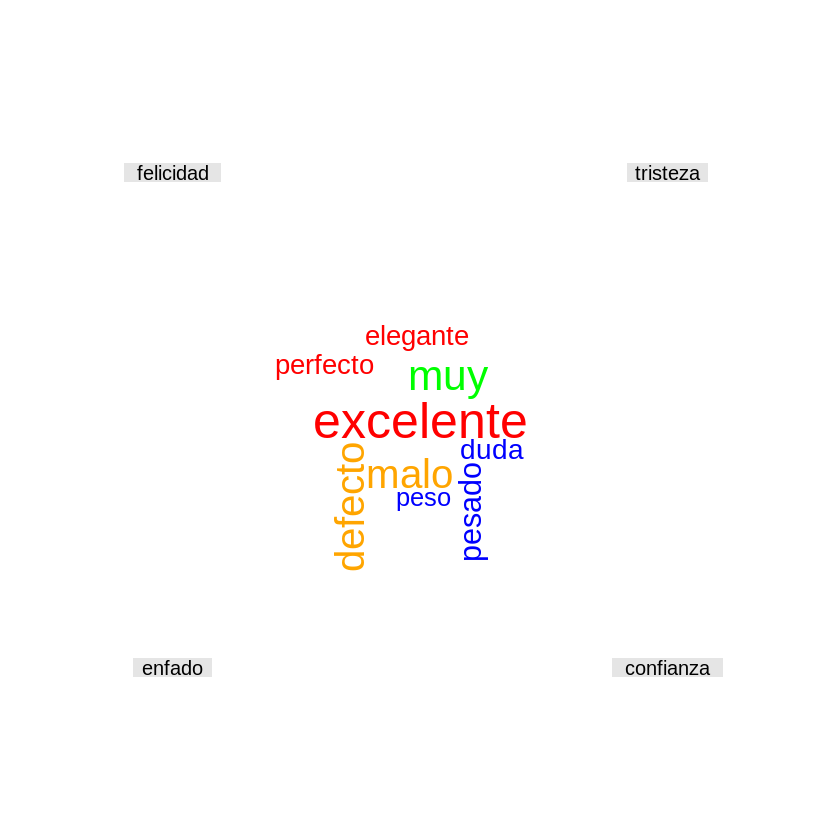

In [151]:
set.seed(1417) # puede ser cualquier número
comparison.cloud(nube_tdm, random.order = FALSE,
                 colors = c("green", "red", "orange", "blue"),
                 title.size = 1, max.words = 50, scale = c(2.5, 1), rot.per = 0.4)